In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

In [2]:
# montar google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_dados = pd.read_csv('/content/drive/My Drive/aneel-imprensa-2020/dados/dados_sem_noticias.csv')

In [4]:
df_dados.head()

Nome Veículo      Categoria Data Notícia  \
0  DIÁRIO DO GRANDE ABC - SP      REGULAÇÃO   2020-01-01   
1       O ESTADO DE S. PAULO  INSTITUCIONAL   2020-01-01   
2       AGÊNCIA O GLOBO - RJ  INSTITUCIONAL   2020-01-01   
3       AGÊNCIA O GLOBO - RJ        MERCADO   2020-01-01   
4       AGÊNCIA O GLOBO - RJ      REGULAÇÃO   2020-01-01   

                                              Título  
0  Atila diminui o orçamento da Arsep,mas aumenta...  
1  Juro menor ajuda a reduzir os custos industria...  
2  Vem aí a Brazil Water Week, evento internacion...  
3  Polo multissetorial de serviços vai mudar a ca...  
4  Polo multissetorial de serviços vai mudar a ca...

In [5]:
# verificando quantidade de linhas e colunas

df_dados.shape

(131878, 4)

In [6]:
# verificando final dos dados

df_dados.tail()

Nome Veículo  \
131873  DIARIO DO TRANSPORTE - SP   
131874               RD NEWS - MT   
131875               RD NEWS - MT   
131876       TV BAHIA / AF. GLOBO   
131877       TV BAHIA / AF. GLOBO   

                                                Categoria Data Notícia  \
131873                                          AGER - MT   2020-12-31   
131874                                            MERCADO   2020-12-31   
131875  ENERGISA MATO GROSSO DISTRIBUIDORA DE ENERGIA S.A   2020-12-31   
131876                                            TARIFAS   2020-12-22   
131877                                            TARIFAS   2020-12-22   

                                                   Título  
131873  Mato Grosso reajusta tarifa de ônibus intermun...  
131874  Prefeito eleito reclama que vai receber uma  h...  
131875  Prefeito eleito reclama que vai receber uma  h...  
131876                                Prévia de inflação,  
131877                                Prévia de inflação,

In [7]:
# verificando quantidade de dados únicos

#df_dados['Categoria'].unique()
len(df_dados['Nome Veículo'].unique())
#df_dados['Data Notícia'].unique()[0:366]

3232

In [8]:
# transforma a coluna Data Notícia em datetime64
df_dados['Data Notícia'] = pd.to_datetime(df_dados['Data Notícia'], format="%Y-%m-%d")

In [9]:
#ordenando por data
df_dados.sort_values(by=['Data Notícia'], ascending=True)

Nome Veículo      Categoria Data Notícia  \
0       DIÁRIO DO GRANDE ABC - SP      REGULAÇÃO   2020-01-01   
70                   CLIC CAMAQUÃ  INSTITUCIONAL   2020-01-01   
69                  G1 - NACIONAL  INSTITUCIONAL   2020-01-01   
68                  G1 - NACIONAL   FISCALIZAÇÃO   2020-01-01   
67                  G1 - NACIONAL   FISCALIZAÇÃO   2020-01-01   
...                           ...            ...          ...   
131818             O LIBERAL - PA  INSTITUCIONAL   2020-12-31   
131816              A GAZETA - MT      AGER - MT   2020-12-31   
131815             ZERO HORA - RS      REGULAÇÃO   2020-12-31   
131823    CORREIO DE SERGIPE - SE        LEILÕES   2020-12-31   
131794  DIÁRIO DE PERNAMBUCO - PE      REGULAÇÃO   2020-12-31   

                                                   Título  
0       Atila diminui o orçamento da Arsep,mas aumenta...  
70      Consumidor pode pagar menos pela energia se ut...  
69      Consumidor pode optar a partir desta quarta pe...  
68      Temporal em Campinas tem granizo, queda de árv...  
67      VÍDEO: Moradores do Cabula registram chuva de ...  
...                                                   ...  
131818  Medida ameniza o impacto  do reajuste em -6,03...  
131816         Passagem sobe para R$ 4,10 a partir de 6¦,  
131815  Receita de sucesso para os novos prefeitos e p...  
131823  Ano de 2021 terá como palavra de ordem a mudan...  
131794  Pernambuco terá mais três parques eólicos,Luci...  

[131878 rows x 4 columns]

In [10]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131878 entries, 0 to 131877
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Nome Veículo  131878 non-null  object        
 1   Categoria     131878 non-null  object        
 2   Data Notícia  131878 non-null  datetime64[ns]
 3   Título        131878 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 4.0+ MB


## Estatísticas descritivas das notícias

In [11]:
series = df_dados['Data Notícia'].groupby([df_dados['Data Notícia'].dt.month, df_dados['Data Notícia'].dt.day]).count()
series.describe()

count     366.000000
mean      360.322404
std       293.336760
min        38.000000
25%       170.500000
50%       305.000000
75%       451.750000
max      2246.000000
Name: Data Notícia, dtype: float64

## Quantidade de notícias por veículos

In [12]:
# quantidade de notícias por veículo
pd.options.display.max_rows = 1000 #60 o padrão

df_noticias_veiculos = df_dados['Nome Veículo'].groupby(df_dados['Nome Veículo']).count().sort_values(ascending=False).to_frame('Quantidade').reset_index()
df_noticias_veiculos['percentual_noticias'] = df_noticias_veiculos['Quantidade'].cumsum()/df_noticias_veiculos['Quantidade'].sum()*100

df_noticias_veiculos[0:500]

Nome Veículo  Quantidade  \
0                                        CANAL ENERGIA        5395   
1                                         PORTAL TERRA        4158   
2                                           PORTAL UOL        3574   
3                                        G1 - NACIONAL        2475   
4                               ISTO É DINHEIRO ONLINE        2326   
5                                         VALOR ONLINE        2244   
6                                 VALOR ECONÔMICO - SP        2020   
7                                PÁGINA DO ESTADO - MT        1976   
8                                REVISTA ISTO É ONLINE        1775   
9                                     ESTAÇÃO LIVRE MT        1340   
10                              O GLOBO - ON LINE - RJ        1288   
11                                TANGARA EM FOCO - MT        1260   
12                                 AGÊNCIA ESTADO - SP        1129   
13                                PARANOÁ ENERGIA - DF        1072   
14                                   FOLHA ONLINE - SP        1051   
15                       REVISTA ÉPOCA NEGÓCIOS ONLINE        1022   
16                                  LAPADA LAPADA - MT         966   
17                                       FOLHAMAX - MT         942   
18                                       TV GLOBO NEWS         902   
19                                O ESTADO DE S. PAULO         822   
20                                REVISTA EXAME ONLINE         822   
21                                       TV CNN BRASIL         796   
22                                                  R7         784   
23                             JORNAL DO COMÉRCIO - RS         780   
24                                JORNAL O DIÁRIO - MT         773   
25                                      PODER 360 - DF         724   
26                                 HIPER NOTÍCIAS - MT         610   
27                                      AGÊNCIA BRASIL         609   
28                                      REUTERS BRASIL         579   
29                            A CRÍTICA - ON LINE - MS         554   
30                              FOLHA DE S. PAULO - SP         531   
31                            JORNAL DO COMMERCIO - PE         524   
32                                       A GAZETA - MT         523   
33                                    INVESTING BRAZIL         518   
34                                   PLANTÃO NEWS - MT         506   
35                     JORNAL O NOROESTE - ONLINE - MT         505   
36                                        O GLOBO - RJ         501   
37                      ESTADO DE MINAS - ON LINE - MG         500   
38                                      O LIBERAL - PA         499   
39                            CORREIO BRAZILIENSE - DF         490   
40                             DIÁRIO DO COMÉRCIO - MG         481   
41                             PORTAL MATO GROSSO - MT         473   
42                                AGÊNCIA O GLOBO - RJ         469   
43                                                 BOL         463   
44                                 TV GLOBO - NACIONAL         445   
45                          DINHEIRO RURAL ONLINE - SP         414   
46                                EXTRA - ON LINE - RJ         402   
47                               O BOM DA NOTÍCIA - MT         395   
48                                  PRIMEIRA HORA - MT         395   
49                 PORTAL CIDADE VERDE - TERESINA - PI         393   
50                                 RÁDIO  CBN NACIONAL         391   
51                                           GAÚCHA ZH         377   
52                                  GUARANTA NEWS - MT         375   
53                           AQUI NOTÍCIAS ONLINE - ES         372   
54                                          CENÁRIO MT         369   
55                                       LEIAGORA - MT         353   
56                                            MIX VA

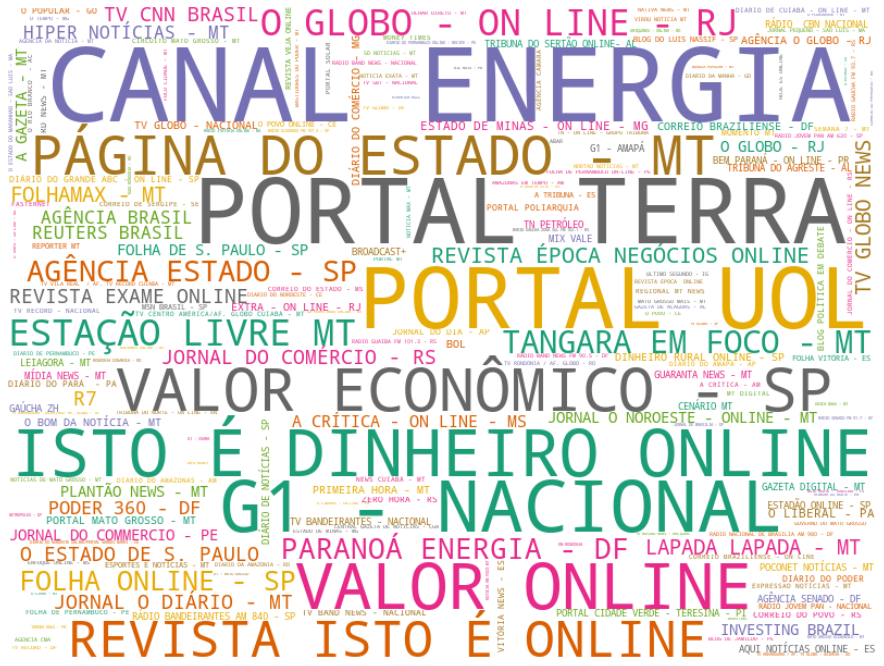

In [13]:
#wordcloud dos veículos
d = {}

for a, x, z in df_noticias_veiculos.values:
  d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

#x, y = np.ogrid[:1000, :1000]
#mask = (x - 500) ** 2 + (y - 500) ** 2 > 480 ** 2
#mask = 255 * mask.astype(int)

#mask = (x / 200) ** 2 + (y / 150) ** 2 > 1
#mask = 255 * mask.astype(int)

wordcloud = WordCloud(width = 800, height = 600, background_color='white', colormap='Dark2', mask=None, random_state=2021)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Dias com picos de notícias

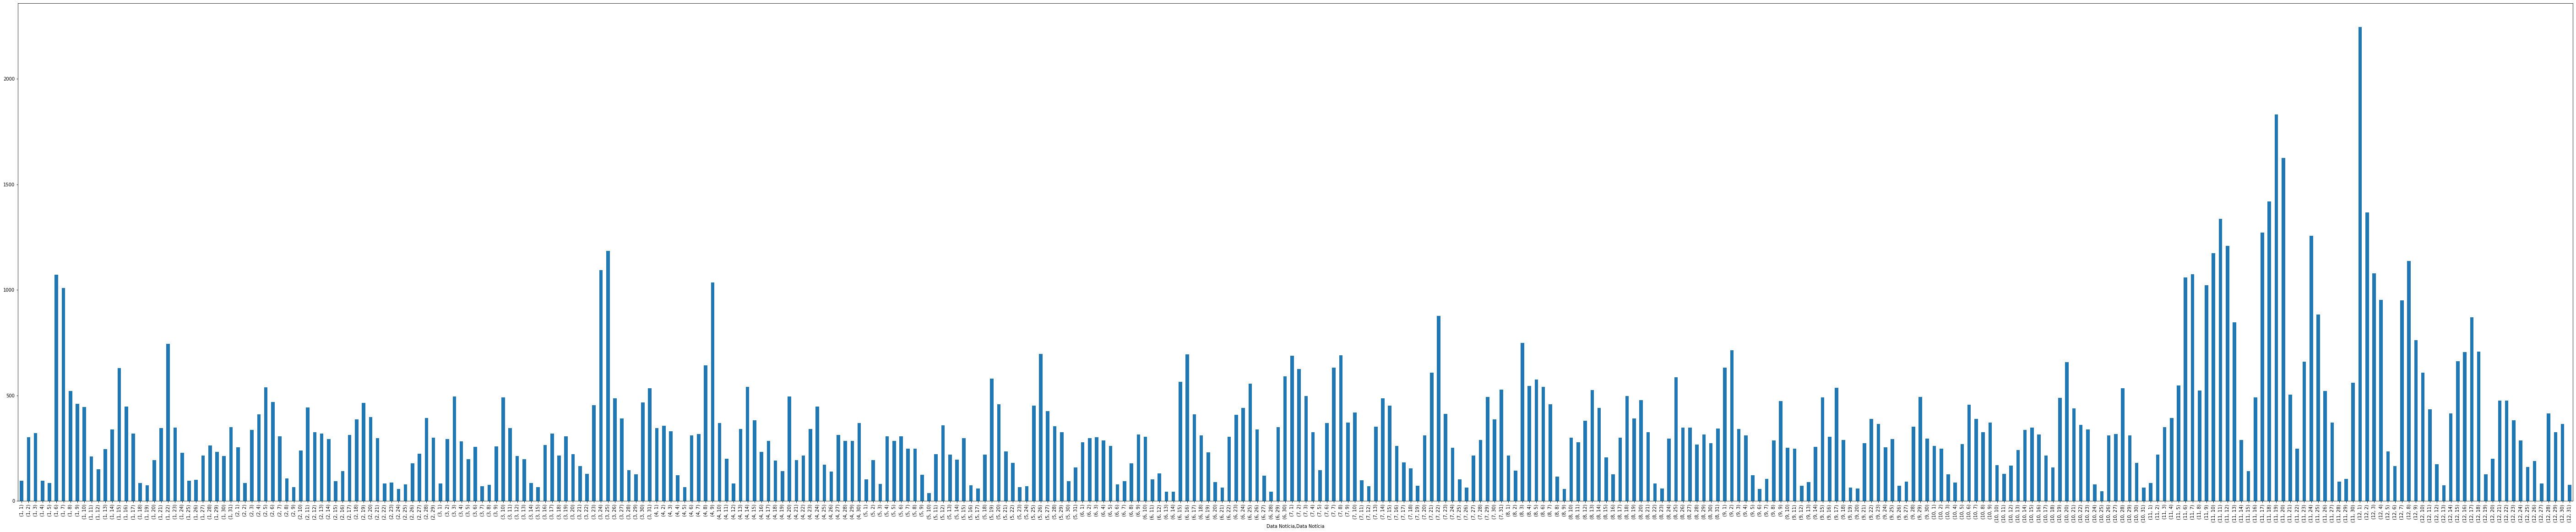

In [15]:
#gráfico para identificar os picos
df_dados['Data Notícia'].groupby([df_dados['Data Notícia'].dt.month, df_dados['Data Notícia'].dt.day]).count().plot(kind='bar', figsize=(100, 20))

(0.0, 2300.0)

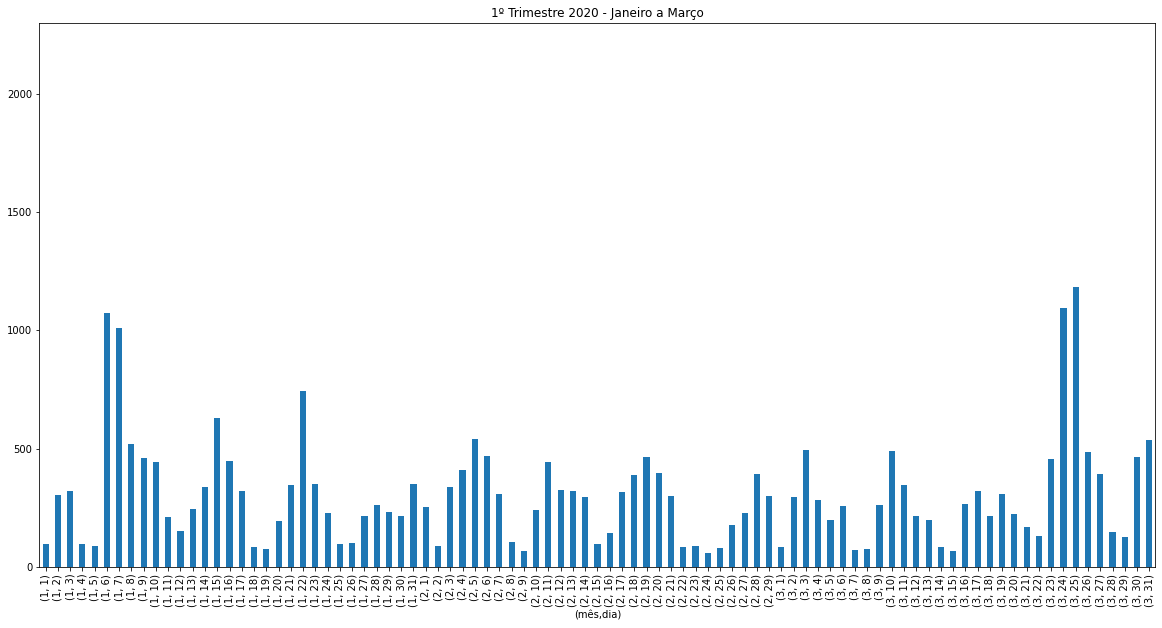

In [17]:
# 1º Trimestre
df_dados['Data Notícia'][df_dados['Data Notícia'].dt.month <= 3].groupby([df_dados['Data Notícia'].dt.month.rename("(mês"), df_dados['Data Notícia'].dt.day.rename("dia)")]).count().plot(
                  kind='bar',
                  figsize=(20, 10),
                  title='1º Trimestre 2020 - Janeiro a Março'
).set_ylim(0, 2300)

(0.0, 2300.0)

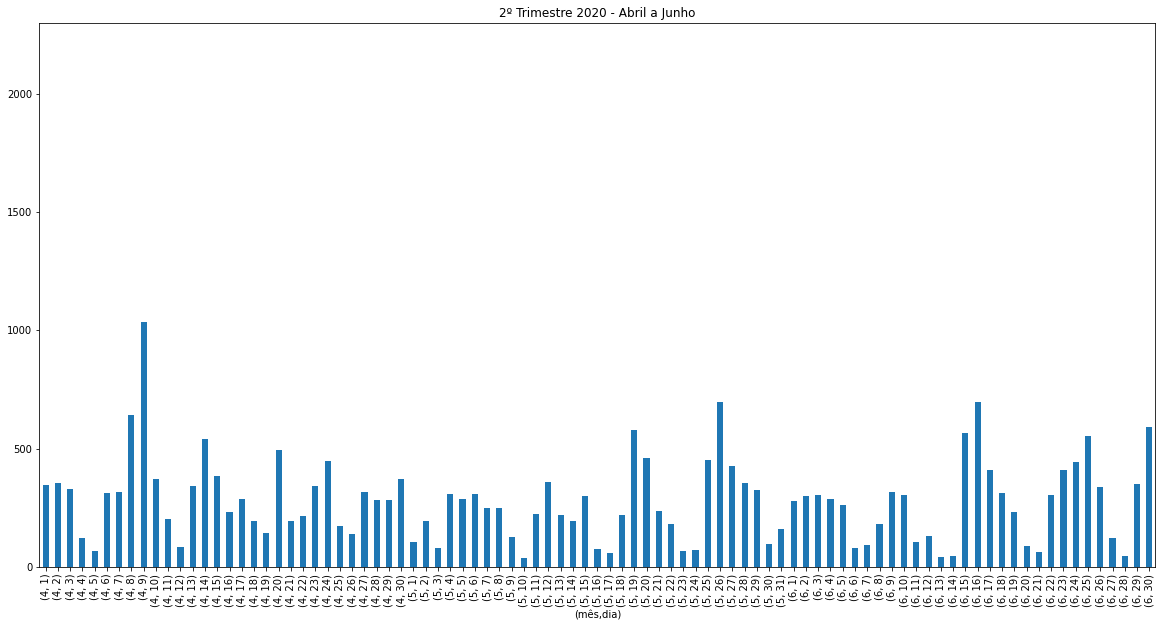

In [18]:
# 2º Trimestre
df_dados['Data Notícia'][(df_dados['Data Notícia'].dt.month >= 4) & (df_dados['Data Notícia'].dt.month <= 6)].groupby([df_dados['Data Notícia'].dt.month.rename("(mês"), df_dados['Data Notícia'].dt.day.rename("dia)")]).count().plot(
    kind='bar', figsize=(20, 10), title='2º Trimestre 2020 - Abril a Junho',
).set_ylim(0, 2300)

(0.0, 2300.0)

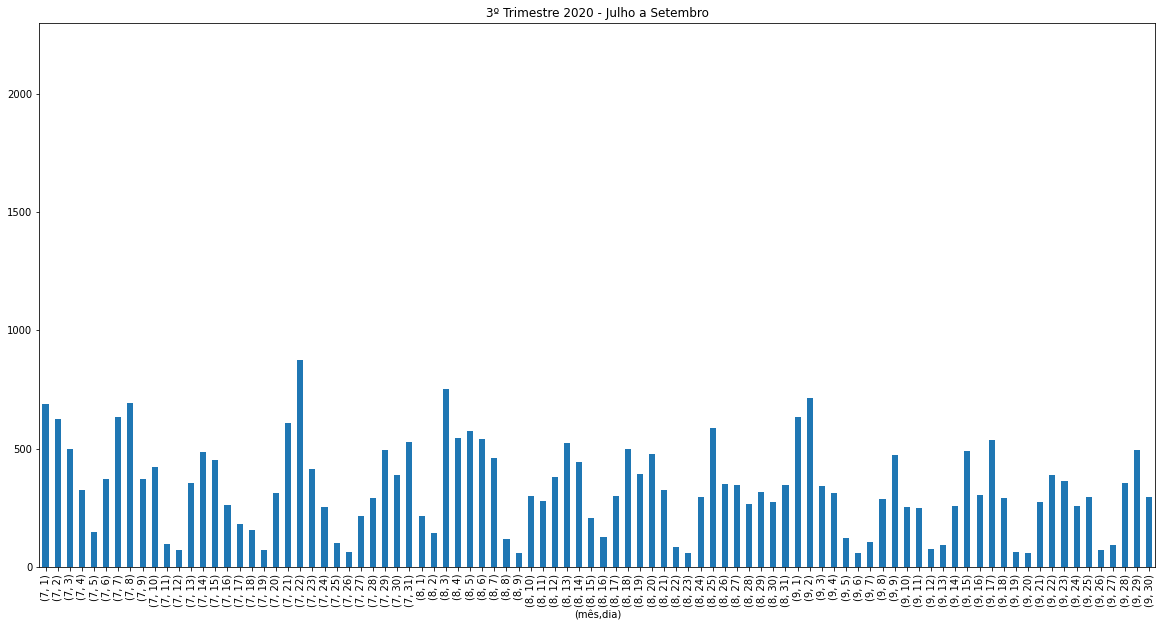

In [19]:
# 3º Trimestre
df_dados['Data Notícia'][(df_dados['Data Notícia'].dt.month >= 7) & (df_dados['Data Notícia'].dt.month <= 9)].groupby([df_dados['Data Notícia'].dt.month.rename("(mês"), df_dados['Data Notícia'].dt.day.rename("dia)")]).count().plot(
    kind='bar', figsize=(20, 10), title='3º Trimestre 2020 - Julho a Setembro',
).set_ylim(0, 2300)

(0.0, 2300.0)

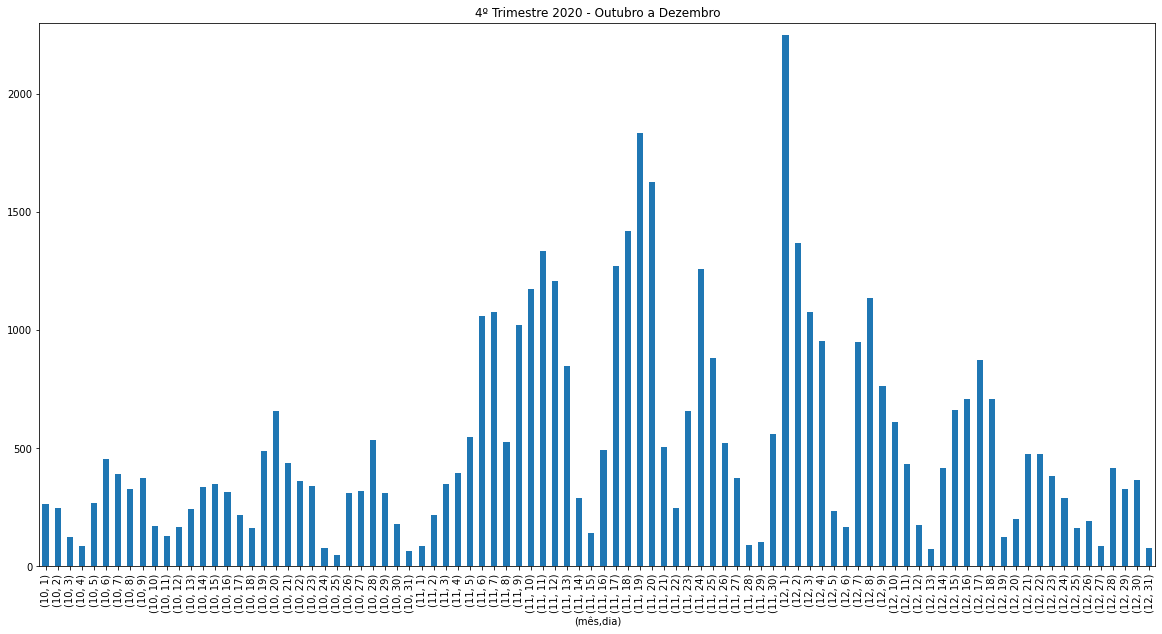

In [20]:
# 4º Trimestre
df_dados['Data Notícia'][(df_dados['Data Notícia'].dt.month >= 10) & (df_dados['Data Notícia'].dt.month <= 12)].groupby([df_dados['Data Notícia'].dt.month.rename("(mês"), df_dados['Data Notícia'].dt.day.rename("dia)")]).count().plot(
    kind='bar', figsize=(20, 10), title='4º Trimestre 2020 - Outubro a Dezembro',
).set_ylim(0, 2300)

In [21]:
df_dados['Data Notícia'].dt.month.rename('Mês')

0          1
1          1
2          1
3          1
4          1
          ..
131873    12
131874    12
131875    12
131876    12
131877    12
Name: Mês, Length: 131878, dtype: int64

In [22]:
#dias com maior quantidade de notícias
df_dados['Data Notícia'].groupby(df_dados['Data Notícia']).count().sort_values(ascending=False)[0:30]

Data Notícia
2020-12-01    2246
2020-11-19    1832
2020-11-20    1626
2020-11-18    1420
2020-12-02    1368
2020-11-11    1336
2020-11-17    1271
2020-11-24    1257
2020-11-12    1208
2020-03-25    1184
2020-11-10    1175
2020-12-08    1137
2020-03-24    1094
2020-12-03    1078
2020-11-07    1075
2020-01-06    1073
2020-11-06    1059
2020-04-09    1036
2020-11-09    1023
2020-01-07    1009
2020-12-04     953
2020-12-07     951
2020-11-25     883
2020-07-22     876
2020-12-17     871
2020-11-13     847
2020-12-09     761
2020-08-03     750
2020-01-22     744
2020-09-02     715
Name: Data Notícia, dtype: int64

In [23]:
#Picos
#06 e 07 de janeiro
#24 e 25 de março
#9 de abril
#22 de julho
#3 de agosto
#1 e 2 de setembro
#6 a 13 de novembro (pico no dia 11)
#17 a 20 de novembro (pico no dia 19)
#24 de novembro
#1 de dezembro (maior pico)
#8 de dezembro
#17 de dezembro
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows = 1000 #60 o padrão

In [24]:
df_dados['Título'][df_dados["Data Notícia"].isin(['2020-01-06', '2020-01-07'])].sample(50)
df_dados['Título'][df_dados["Data Notícia"] == '2020-12-01'].sample(50)

115746                                                                   Conta de luz ficará mais cara em dezembro,Leiagora
114904                                          Conta de luz volta a ter cobrança de taxa extra em todo o País, diz Aneel,-
116408                            Aneel aprova proposta para regulamentar repactuação do risco hidrológico,Estadão Conteúdo
116064                       Bolsonaro justifica alta na conta de luz com nível de represas e risco de apagões,Ceissa Kruse
115276                                     Bolsonaro sobre alta na conta de luz: "Se nada fizermos, poderemos ter apagões",
116226             Instituições financeiras elevam estimativa para IPCA 2020 acima do centro da meta após decisão da Aneel,
115857                                     Conta de luz fica mais cara a partir de hoje! Confira algumas dicas de economia,
116392                                                         Conta de luz ficará mais cara em dezembro,Rondoniadireta.com
115989  

In [ ]:
#selecionando algumas notícias nos dias de pico
#descomentar a linha desejada
# df_dados['Título'][df_dados["Data Notícia"].isin(['2020-01-06', '2020-01-07'])].sample(50).to_string(index=False).strip()
# df_dados['Título'][df_dados["Data Notícia"].isin(['2020-03-24', '2020-03-25'])].sample(50).to_string(index=False).strip()
# df_dados['Título'][df_dados["Data Notícia"].isin(['2020-04-09'])].sample(50).to_string(index=False).strip()
# df_dados['Título'][df_dados["Data Notícia"].isin(['2020-07-22'])].sample(50).to_string(index=False).strip()
# df_dados['Título'][df_dados["Data Notícia"].isin(['2020-08-03'])].sample(50).strip()
# df_dados['Título'][df_dados["Data Notícia"].isin(['2020-09-01', '2020-09-02'])].sample(50).to_string(index=False).strip()
# df_dados['Título'][df_dados["Data Notícia"].isin(['2020-11-11'])].sample(50).to_string(index=False).strip()
# df_dados['Título'][df_dados["Data Notícia"].isin(['2020-11-19'])].sample(50).to_string(index=False).strip()
# df_dados['Título'][df_dados["Data Notícia"].isin(['2020-11-24'])].sample(50).to_string(index=False).strip()
# df_dados['Título'][df_dados["Data Notícia"].isin(['2020-12-01'])].sample(50).to_string(index=False).strip()
# df_dados['Título'][df_dados["Data Notícia"].isin(['2020-12-08'])].sample(50).to_string(index=False).strip()
# df_dados['Título'][df_dados["Data Notícia"].isin(['2020-12-17'])].sample(50).to_string(index=False).strip()

## Notícias com Categoria ANEEL

In [25]:
df_dados['Categoria'][df_dados['Categoria'] == 'ANEEL'].groupby(df_dados['Categoria']).count().sort_values(ascending=False).to_frame('Quantidade').reset_index()

Categoria  Quantidade
0     ANEEL       11032

In [26]:
df_dados_aneel_categoria = df_dados[df_dados['Categoria'] == 'ANEEL']
df_dados_aneel_categoria.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11032 entries, 434 to 131850
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Nome Veículo  11032 non-null  object        
 1   Categoria     11032 non-null  object        
 2   Data Notícia  11032 non-null  datetime64[ns]
 3   Título        11032 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 430.9+ KB


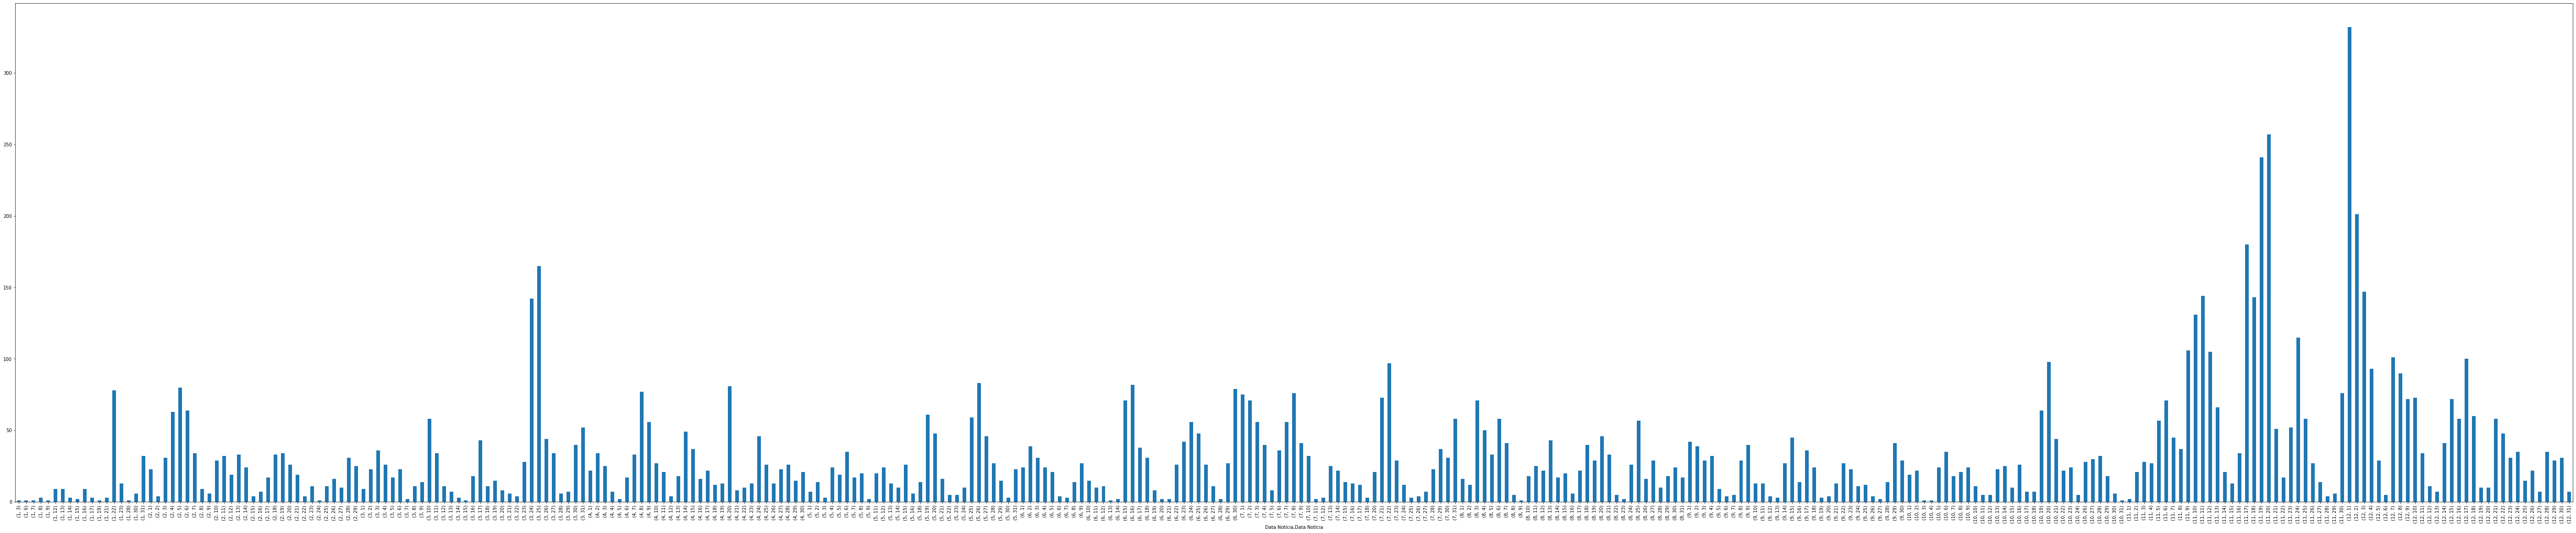

In [27]:
#gráfico para identificar os picos
df_dados_aneel_categoria['Data Notícia'].groupby([df_dados_aneel_categoria['Data Notícia'].dt.month, df_dados_aneel_categoria['Data Notícia'].dt.day]).count().plot(kind='bar', figsize=(100, 20))

(0.0, 400.0)

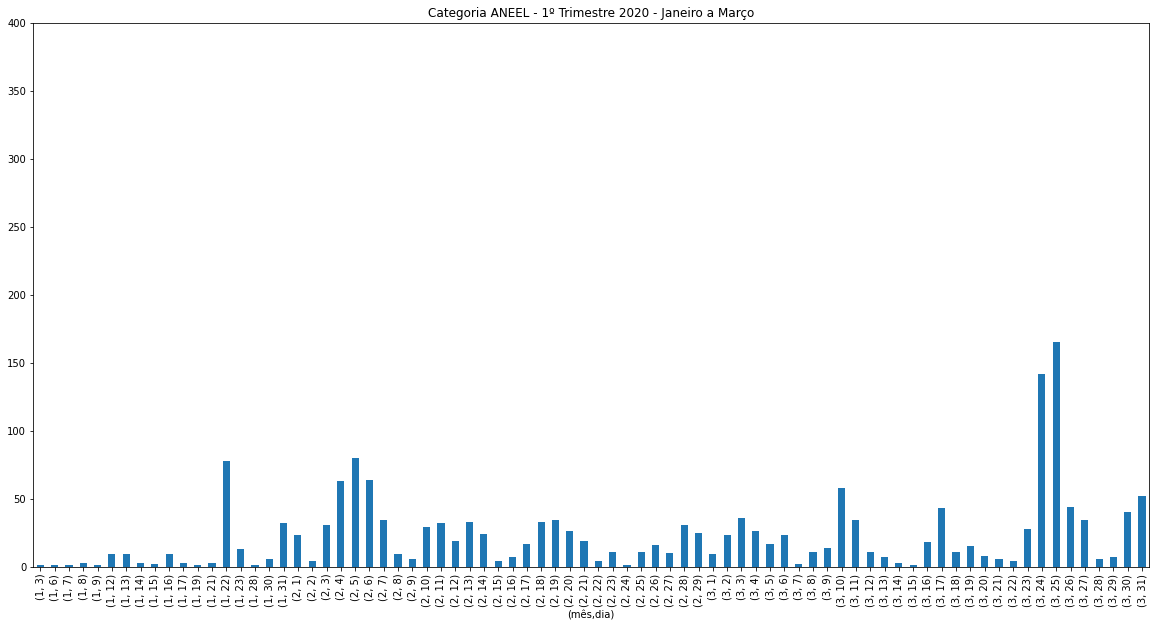

In [28]:
# 1º Trimestre
df_dados_aneel_categoria['Data Notícia'][df_dados_aneel_categoria['Data Notícia'].dt.month <= 3].groupby([df_dados_aneel_categoria['Data Notícia'].dt.month.rename("(mês"), df_dados_aneel_categoria['Data Notícia'].dt.day.rename("dia)")]).count().plot(
    kind='bar',
    figsize=(20, 10),
    title='Categoria ANEEL - 1º Trimestre 2020 - Janeiro a Março').set_ylim(0, 400)

(0.0, 400.0)

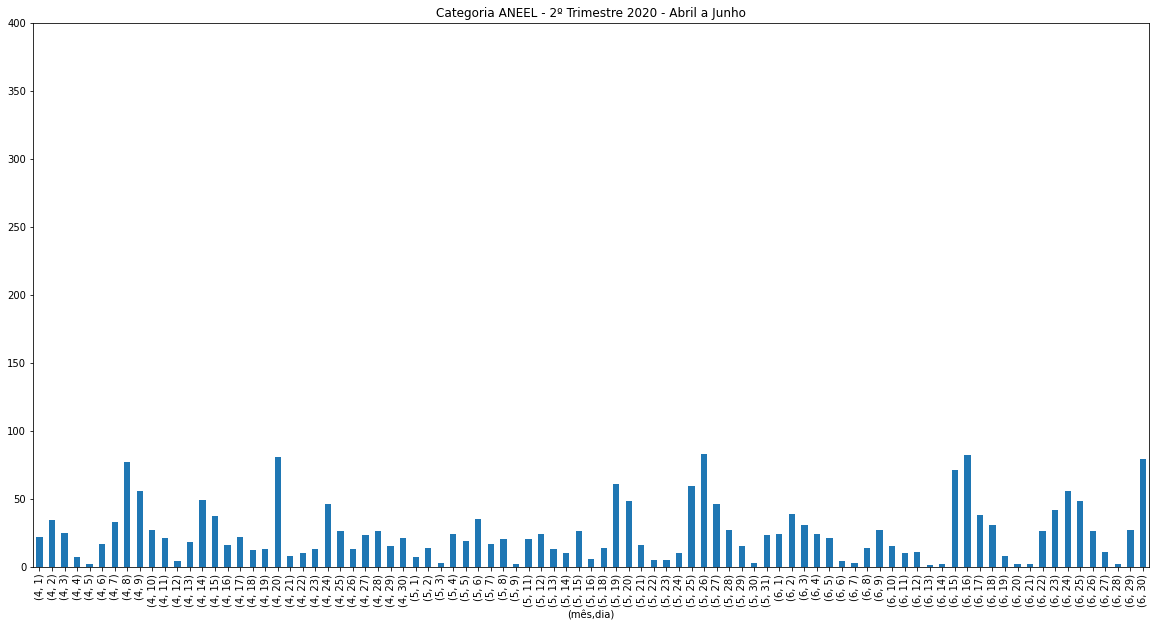

In [29]:
# 2º Trimestre
df_dados_aneel_categoria['Data Notícia'][(df_dados_aneel_categoria['Data Notícia'].dt.month >= 4) & (df_dados_aneel_categoria['Data Notícia'].dt.month <= 6)].groupby([df_dados_aneel_categoria['Data Notícia'].dt.month.rename("(mês"), df_dados_aneel_categoria['Data Notícia'].dt.day.rename("dia)")]).count().plot(
    kind='bar', figsize=(20, 10), title='Categoria ANEEL - 2º Trimestre 2020 - Abril a Junho',
).set_ylim(0, 400)

(0.0, 400.0)

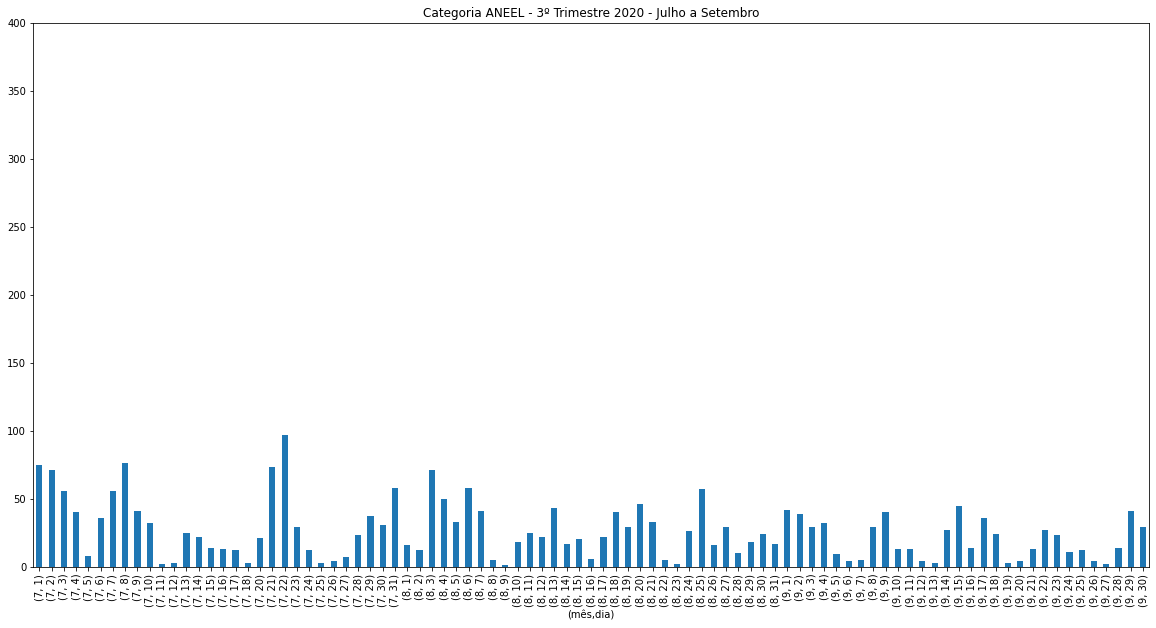

In [30]:
# 3º Trimestre
df_dados_aneel_categoria['Data Notícia'][(df_dados_aneel_categoria['Data Notícia'].dt.month >= 7) & (df_dados_aneel_categoria['Data Notícia'].dt.month <= 9)].groupby([df_dados_aneel_categoria['Data Notícia'].dt.month.rename("(mês"), df_dados_aneel_categoria['Data Notícia'].dt.day.rename("dia)")]).count().plot(
    kind='bar', figsize=(20, 10), title='Categoria ANEEL - 3º Trimestre 2020 - Julho a Setembro',
).set_ylim(0, 400)

(0.0, 400.0)

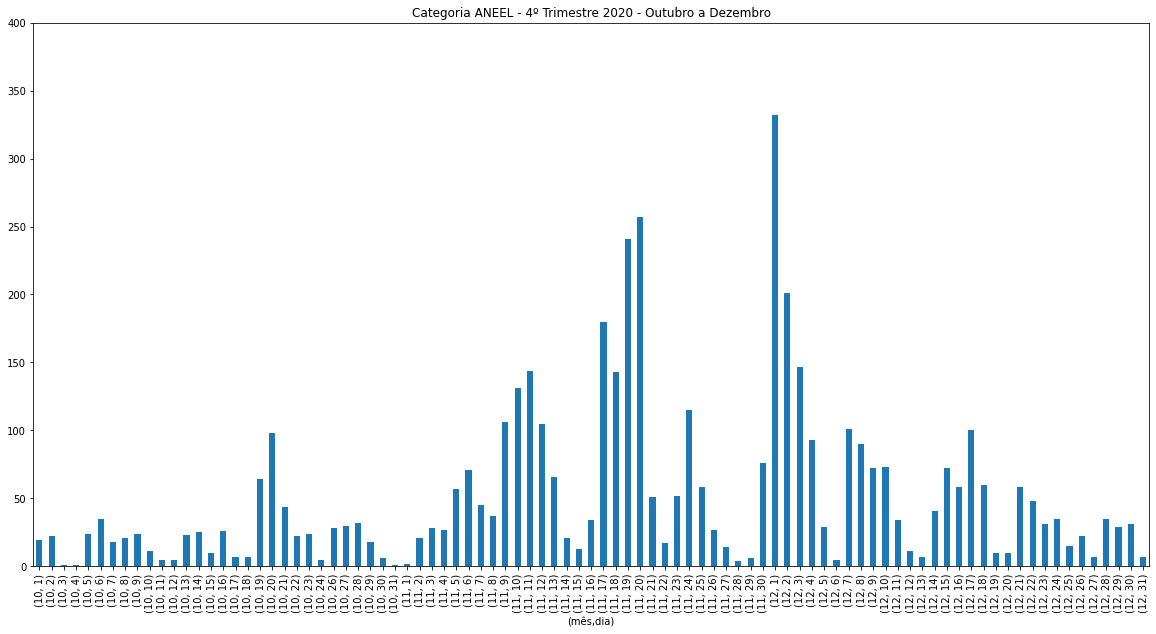

In [31]:
# 4º Trimestre
df_dados_aneel_categoria['Data Notícia'][(df_dados_aneel_categoria['Data Notícia'].dt.month >= 10) & (df_dados_aneel_categoria['Data Notícia'].dt.month <= 12)].groupby([df_dados_aneel_categoria['Data Notícia'].dt.month.rename("(mês"), df_dados_aneel_categoria['Data Notícia'].dt.day.rename("dia)")]).count().plot(
    kind='bar', figsize=(20, 10), title='Categoria ANEEL - 4º Trimestre 2020 - Outubro a Dezembro',
).set_ylim(0, 400)

In [32]:
#quantidade de notícias por veículo
pd.options.display.max_rows = 1000 #60 o padrão
df_noticias_veiculos = df_dados_aneel_categoria['Nome Veículo'].groupby(df_dados_aneel_categoria['Nome Veículo']).count().sort_values(ascending=False).to_frame('Quantidade').reset_index()
df_noticias_veiculos['percentual_noticias'] = df_noticias_veiculos['Quantidade'].cumsum()/df_noticias_veiculos['Quantidade'].sum()*100

df_noticias_veiculos[0:500]

Nome Veículo  Quantidade  \
0                                           CANAL ENERGIA        1142   
1                                            PORTAL TERRA         507   
2                                              PORTAL UOL         463   
3                                  ISTO É DINHEIRO ONLINE         322   
4                                            VALOR ONLINE         272   
5                                   REVISTA ISTO É ONLINE         267   
6                                   PÁGINA DO ESTADO - MT         258   
7                                    VALOR ECONÔMICO - SP         248   
8                                           G1 - NACIONAL         227   
9                                     AGÊNCIA ESTADO - SP         195   
10                                   PARANOÁ ENERGIA - DF         166   
11                                          TV CNN BRASIL         164   
12                                          TV GLOBO NEWS         155   
13                                 O GLOBO - ON LINE - RJ         131   
14                          REVISTA ÉPOCA NEGÓCIOS ONLINE         126   
15                                   TANGARA EM FOCO - MT         123   
16                                      FOLHA ONLINE - SP         112   
17                                JORNAL DO COMÉRCIO - RS         100   
18                                                     R7          98   
19                                       ESTAÇÃO LIVRE MT          94   
20                                   O ESTADO DE S. PAULO          94   
21                                         PODER 360 - DF          90   
22                                         REUTERS BRASIL          83   
23                                         O LIBERAL - PA          83   
24                                   REVISTA EXAME ONLINE          83   
25                                    HIPER NOTÍCIAS - MT          80   
26                                     LAPADA LAPADA - MT          77   
27                                   JORNAL O DIÁRIO - MT          73   
28                               JORNAL DO COMMERCIO - PE          71   
29                                          FOLHAMAX - MT          69   
30                             TV BANDEIRANTES - NACIONAL          68   
31                                    RÁDIO  CBN NACIONAL          67   
32                                         AGÊNCIA BRASIL          66   
33                         RÁDIO BANDEIRANTES AM 840 - SP          65   
34                               CORREIO BRAZILIENSE - DF          64   
35                                    TV GLOBO - NACIONAL          63   
36                                DIÁRIO DO COMÉRCIO - MG          59   
37                                           O GLOBO - RJ          58   
38                TV CENTRO AMÉRICA/AF. GLOBO CUIABÁ - MT          58   
39                        JORNAL O NOROESTE - ONLINE - MT          58   
40                                          A GAZETA - MT          58   
41                                TV BAND NEWS - NACIONAL          53   
42                                    AGÊNCIA SENADO - DF          52   
43                                      PLANTÃO NEWS - MT          51   
44                                   TV RECORD - NACIONAL          51   
45                                 FOLHA DE S. PAULO - SP          50   
46                             RÁDIO JOVEM PAN - NACIONAL          48   
47                                   DIÁRIO DO PARÁ  - PA          47   
48                                PORTAL MATO GROSSO - MT          46   
49                                  O BOM DA NOTÍCIA - MT          45   
50                                     JORNAL DO DIA - AP          41   
51                                             G1 - AMAPÁ          41   
52                                DIÁRIO DO AMAZONAS - AM          39   
53                                     PRIMEIRA HORA - MT          39   
54                    PORTAL C

In [33]:
d = {}
for a, x in df_noticias_veiculos[['Nome Veículo', 'Quantidade']].values:
  d[a] = x

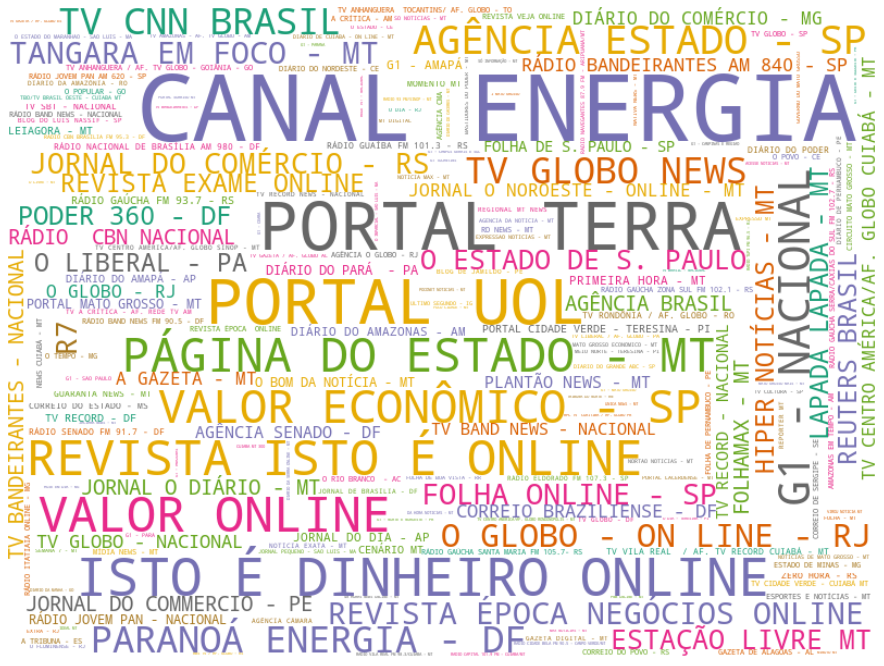

In [34]:
#wordcloud dos veículos
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 600, background_color='white', colormap='Dark2', mask=None, random_state=2021)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()